# Aula 1 Reconhecendo o Problema

### Preparação do Ambiente


In [ ]:
import matplotlib.pyplot as plt
import cv2
import seaborn
import dlib

In [ ]:
cv2.__version__

'4.7.0'

### Abrindo Uma imagem com Opencv e Matplotlib

In [ ]:
!wget "https://raw.githubusercontent.com/alura-cursos/alura-analise-facial/aula_1/imagens/px-girl.jpg"

--2023-06-20 21:49:28--  https://raw.githubusercontent.com/alura-cursos/alura-analise-facial/aula_1/imagens/px-girl.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144832 (141K) [image/jpeg]
Saving to: ‘px-girl.jpg’

px-girl.jpg         100%[===================>] 141.44K  --.-KB/s    in 0.003s  

2023-06-20 21:49:28 (40.4 MB/s) - ‘px-girl.jpg’ saved [144832/144832]



In [ ]:
img = cv2.imread("/content/px-girl.jpg")

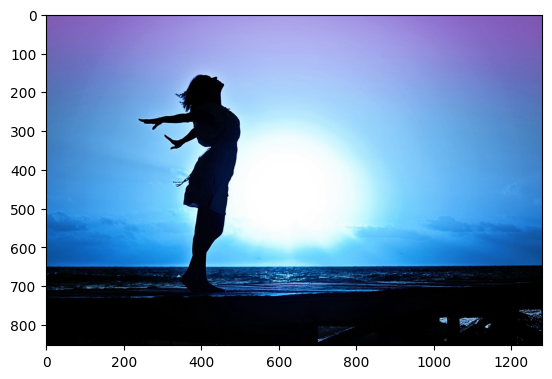

In [ ]:
plt.imshow(img)

A imagem esta em BGR, precisamos arrumar a coloração da imagem

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

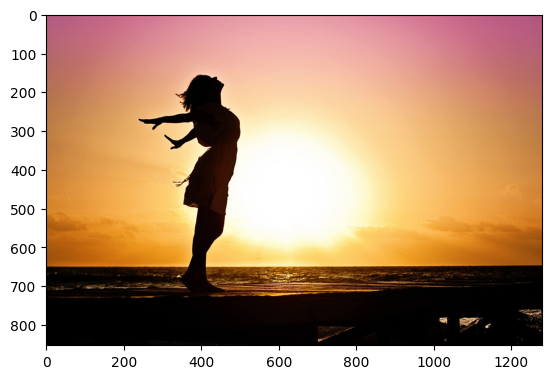

In [ ]:
plt.imshow(img_rgb)

Ao analisarmos essa imagem percebemos que a imagem tem 3 dimensões

In [ ]:
img_rgb.shape

(853, 1280, 3)

Quando fazemos a conversão para cinza essa imagem deixa de possuir 3 dimensões pois só possui a escala de cinza

In [ ]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

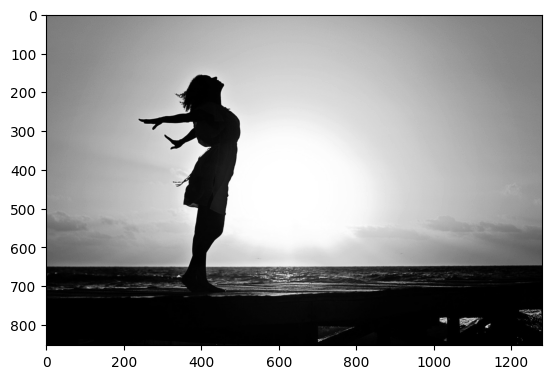

In [ ]:
plt.imshow(img_gray, cmap = "gray")

In [ ]:
img_gray.shape

(853, 1280)

Diferente da outra existe apenas uma unica dimensão

### Definindo uma regia de interesse Manualmente

In [ ]:
!wget "https://raw.githubusercontent.com/alura-cursos/alura-analise-facial/aula_1/imagens/px-people.jpg"

--2023-06-20 22:29:32--  https://raw.githubusercontent.com/alura-cursos/alura-analise-facial/aula_1/imagens/px-people.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250324 (244K) [image/jpeg]
Saving to: ‘px-people.jpg’

px-people.jpg       100%[===================>] 244.46K  --.-KB/s    in 0.005s  

2023-06-20 22:29:32 (43.9 MB/s) - ‘px-people.jpg’ saved [250324/250324]



In [ ]:
img = cv2.imread("/content/px-people.jpg")

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

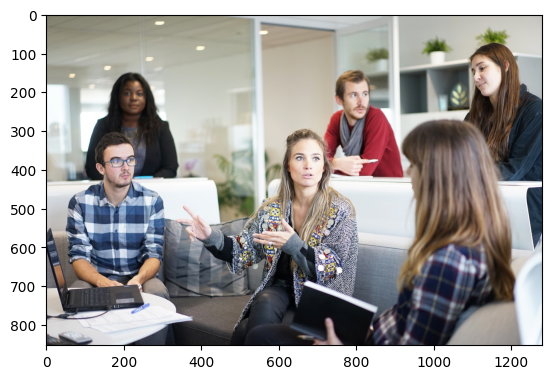

In [ ]:
plt.imshow(img)

Para obter uma região de interesse na imagem basta fazermos um slicing

In [ ]:
img_sliced = img[80:220,1075:1200]

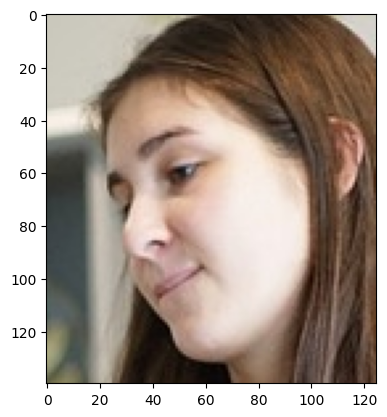

In [ ]:
plt.imshow(img_sliced)

E com isso podemos fazer o processamento devido, toda imagem quando necessitamos de uma parte podemos foca-las utilizando o slicing

# Aula 2 Segmentação de faces